Setup

In [38]:
import sklearn
import numpy as np
import pandas as pd
from sklearn.linear_model import Perceptron
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import models, layers
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

Uploading dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving FOOD-DATA-GROUP.csv to FOOD-DATA-GROUP.csv


In [ ]:
df = pd.read_csv('FOOD-DATA-GROUP.csv')
df = df.drop("food", axis=1)
features = df.drop("Caloric Value", axis=1).columns.tolist()
target = "Caloric Value"
df['Protein+Carbohydrates+Fat'] = df['Protein']+df['Carbohydrates']+df['Fat']
selected_features = ['Nutrition Density', 'Monounsaturated Fats', 'Phosphorus', 'Calcium', 'Sodium', 'Vitamin B11', 'Dietary Fiber', 'Copper', 'Selenium', 'Protein+Carbohydrates+Fat']
X = df[selected_features]
y = df[target]
#Removing outliers
from scipy.stats import zscore
z_scores = np.abs(zscore(X))
threshold = 3
X_no_outliers = X[(z_scores < threshold).all(axis=1)]
df_no_outliers = df.loc[X_no_outliers.index]
print(f"Original shape: {df.shape}, Shape after removing outliers: {df_no_outliers.shape}")
X = df_no_outliers[selected_features]
y = df_no_outliers[target]

num_features = selected_features
num_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features)
    ])

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the training data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

Original shape: (2395, 35), Shape after removing outliers: (2199, 35)


Defining MLP model

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 69916.2500 - val_loss: 75449.0859
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 75504.6562 - val_loss: 72036.7891
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 61056.3477 - val_loss: 62807.5273
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 58549.6836 - val_loss: 45698.5156
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31353.9824 - val_loss: 28011.1797
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20319.6836 - val_loss: 18742.0684
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11515.5508 - val_loss: 14602.0479
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7686.1611 - val_loss: 12149.3037
Epoch 9/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6155.8594 - val_loss: 10319.4111
Epoch 10/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5093.7241 - val_loss: 9068.3086
Epoch 11/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4393.2852 - val_loss: 809

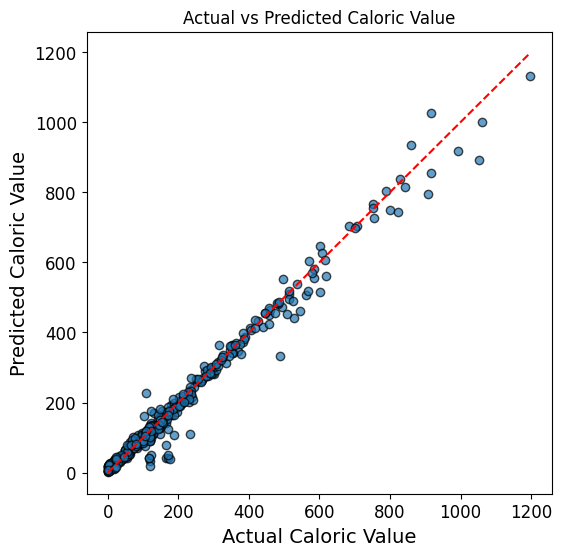

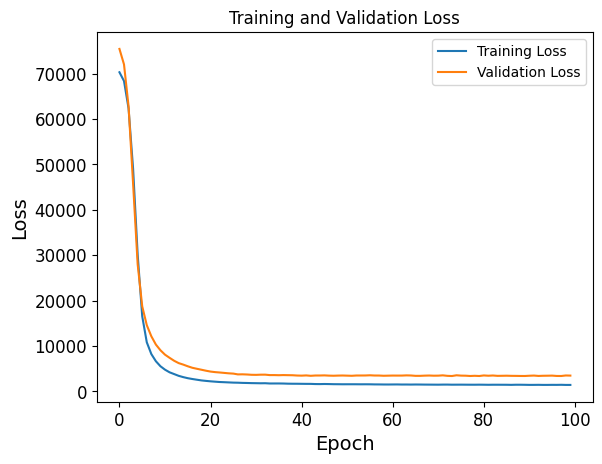

In [40]:
# Defining the MLP model using TensorFlow (Keras API)
model = models.Sequential()

# Adding input layer (input_dim is the number of features)
model.add(layers.Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Adding hidden layers (you can adjust the number of layers and neurons)
model.add(layers.Dense(32, activation='relu'))

# Output layer for regression (single unit for Caloric Value prediction)
model.add(layers.Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

# Optional: Plot actual vs predicted values
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Caloric Value')
plt.ylabel('Predicted Caloric Value')
plt.title('Actual vs Predicted Caloric Value')
plt.show()

# Optional: Plot training history (loss curve)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()